In [ ]:
# Install Required Libraries

# !pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1
# !pip install category_encoders
# !pip install -U imbalanced-learn
# !pip install pycaret

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from pandas.tseries.offsets import DateOffset
from ydata_profiling import ProfileReport
import seaborn as sns

# **Data Cleaning**

Let's begin by loading the data files to gain a better understanding of the data and address any necessary data type corrections.

In [ ]:
# Reading data
df_install = pd.read_csv('installs.txt', sep='\t')
df_start_target = pd.read_csv('app starts july.txt', sep='\t')
df_start = pd.read_csv('app starts.txt', sep='\t')
df_view_target = pd.read_csv('brochure views july.txt', sep='\t')
df_view = pd.read_csv('brochure views.txt', sep='\t')

## Install Events

In [ ]:
df_install.head(5)

,id,InstallDate,productId,userId,model,campaignId
0,37371890,2017-05-04 10:06:27.8070000,de.kaufda.kaufda,5fc13850-de51-4426-96ce-72aaec895abb,"ipad2,7",000000
1,36979918,2017-04-24 09:27:16.1730000,com-bonial-kaufda,b13a035e-e9bf-49db-8f93-b49d491bef53,sm-g800f,3iikhy
2,37371070,2017-05-04 16:05:09.5680000,de.kaufda.kaufda,5deb0aad-43bb-4ee1-868b-98f36c3d5bbf,"iphone8,4",tl3cy8
3,36897929,2017-04-22 13:18:18.4370000,com-bonial-kaufda,64707e97-d5e1-4622-a89a-bebf8432fd33,sm-g955f,000000
4,36606053,2017-04-15 14:03:51.1990000,com-bonial-kaufda,770a391d-eda5-423b-b672-845f1e12661f,sm-j320h,000000


In [ ]:
# Checking data types
df_install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20000 non-null  int64 
 1   InstallDate  20000 non-null  object
 2   productId    20000 non-null  object
 3   userId       20000 non-null  object
 4   model        19963 non-null  object
 5   campaignId   20000 non-null  object
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [ ]:
# Fixing data types
df_install['InstallDate'] = pd.to_datetime(df_install['InstallDate'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # Truncating to date
df_install = df_install.convert_dtypes()

In [ ]:
df_install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           20000 non-null  Int64         
 1   InstallDate  20000 non-null  datetime64[ns]
 2   productId    20000 non-null  string        
 3   userId       20000 non-null  string        
 4   model        19963 non-null  string        
 5   campaignId   20000 non-null  string        
dtypes: Int64(1), datetime64[ns](1), string(4)
memory usage: 957.2 KB


In [ ]:
df_install.describe(include='all')

<ipython-input-11-dda7ab95e1ef>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_install.describe(include='all')


,id,InstallDate,productId,userId,model,campaignId
count,20000.0,20000,20000,20000,19963,20000
unique,<NA>,61,3,20000,1210,933
top,<NA>,2017-04-23 00:00:00,com-bonial-kaufda,5fc13850-de51-4426-96ce-72aaec895abb,gt-i9195,000000
freq,<NA>,396,9726,1,1019,13376
first,<NA>,2017-04-01 00:00:00,NaN,NaN,NaN,NaN
last,<NA>,2017-05-31 00:00:00,NaN,NaN,NaN,NaN
mean,37261288.4112,NaN,NaN,NaN,NaN,NaN
std,710694.638078,NaN,NaN,NaN,NaN,NaN
min,35988953.0,NaN,NaN,NaN,NaN,NaN
25%,36653540.75,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking duplicates in installs
df_install.groupby('userId').filter(lambda x: len(x) > 2)

,id,InstallDate,productId,userId,model,campaignId


## View Events

In [ ]:
df_view.head(5)

,id,userId,dateCreated,page_turn_count,view_duration,brochure_id
0,6269194661,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:09.5390000,30,95172.0,672239440
1,6269192581,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:00.6970000,2,4000.0,673861625
2,6269188351,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:39.9170000,1,14000.0,660764240
3,6204426632,fa623647-dfc9-49b4-bbb6-77cbacd599f4,2017-04-30 23:46:13.5970000,64,168000.0,672658544
4,6204424112,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:02.1970000,1,33000.0,660764240


In [ ]:
df_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279213 entries, 0 to 279212
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               279213 non-null  int64  
 1   userId           279213 non-null  object 
 2   dateCreated      279213 non-null  object 
 3   page_turn_count  279213 non-null  int64  
 4   view_duration    269602 non-null  float64
 5   brochure_id      279213 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 12.8+ MB


In [ ]:
# Fixing data types
df_view['dateCreated'] = pd.to_datetime(df_view['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_view = df_view.convert_dtypes()

df_view_target['dateCreated'] = pd.to_datetime(df_view_target['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_view_target = df_view_target.convert_dtypes()

In [ ]:
df_view.describe(include='all')

<ipython-input-16-42c768a2d926>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_view.describe(include='all')


,id,userId,dateCreated,page_turn_count,view_duration,brochure_id
count,279213.0,279213,279213,279213.0,269602.0,279213.0
unique,<NA>,10943,91,<NA>,<NA>,<NA>
top,<NA>,9bf3ab9b-4f07-4e54-ac21-d92cf2afcea8,2017-05-28 00:00:00,<NA>,<NA>,<NA>
freq,<NA>,659,5809,<NA>,<NA>,<NA>
first,<NA>,NaN,2017-04-01 00:00:00,<NA>,<NA>,<NA>
last,<NA>,NaN,2017-06-30 00:00:00,<NA>,<NA>,<NA>
mean,6546832227.827626,NaN,NaN,15.830352,87376.442593,674667889.432437
std,364284208.886159,NaN,NaN,18.688516,151252.101362,16169830.958383
min,5709033912.0,NaN,NaN,1.0,-18000.0,541614157.0
25%,6269142791.0,NaN,NaN,1.0,11000.0,667893774.0


## Start Events

In [ ]:
df_start.head(5)

,dateCreated,userId
0,2017-06-30 14:14:54.7930000,50e72534-a4f4-40d7-96d5-ecbe4eb314e9
1,2017-06-30 14:03:13.0100000,b3712849-595e-403f-84d2-4698439056b0
2,2017-06-28 16:26:48.3830000,99cea50b-3ecf-4102-8290-997eaf32a6b6
3,2017-06-27 10:23:29.9430000,78c06433-9ea8-4835-aff5-f64b262d0fb4
4,2017-06-27 10:11:27.6340000,510c5f9e-de54-45ee-909c-c14103130e5e


In [ ]:
# Fixing Data Types
df_start['dateCreated'] = pd.to_datetime(df_start['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_start = df_start.convert_dtypes() # fixing data types
df_start_target['dateCreated'] = pd.to_datetime(df_start_target['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_start_target = df_start_target.convert_dtypes() # fixing data types

In [ ]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144104 entries, 0 to 144103
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   dateCreated  144104 non-null  datetime64[ns]
 1   userId       144104 non-null  string        
dtypes: datetime64[ns](1), string(1)
memory usage: 2.2 MB


# **Data Modeling**

We currently have three distinct datasets that are associated with different events conducted by the user. In the next step, we need to create a consolidated data model that integrates all of these datasets. This unified data model will be used for training our machine learning model.



## Problem Framing

The diagram below illustrates our problem is framed.


> Our primary goal is to develop a predictive model that can determine whether a user will remain active or churn during the month of July. So technically July serves as our **Prediction Window.**



> By investigating the data it turnes out the end of May is the cutoff date for our history window. We use the **History Window** in order to understand user behaviour and create features capturing that behaviour.





> It is important to note that users require a certain period of interaction with our app before exhibiting churn behavior. Additionally, we need a sufficient history of user data to understand and predict their behavior effectively.


Consequently, **we only consider users who have had at least one month of interaction before the end of the History Window.**



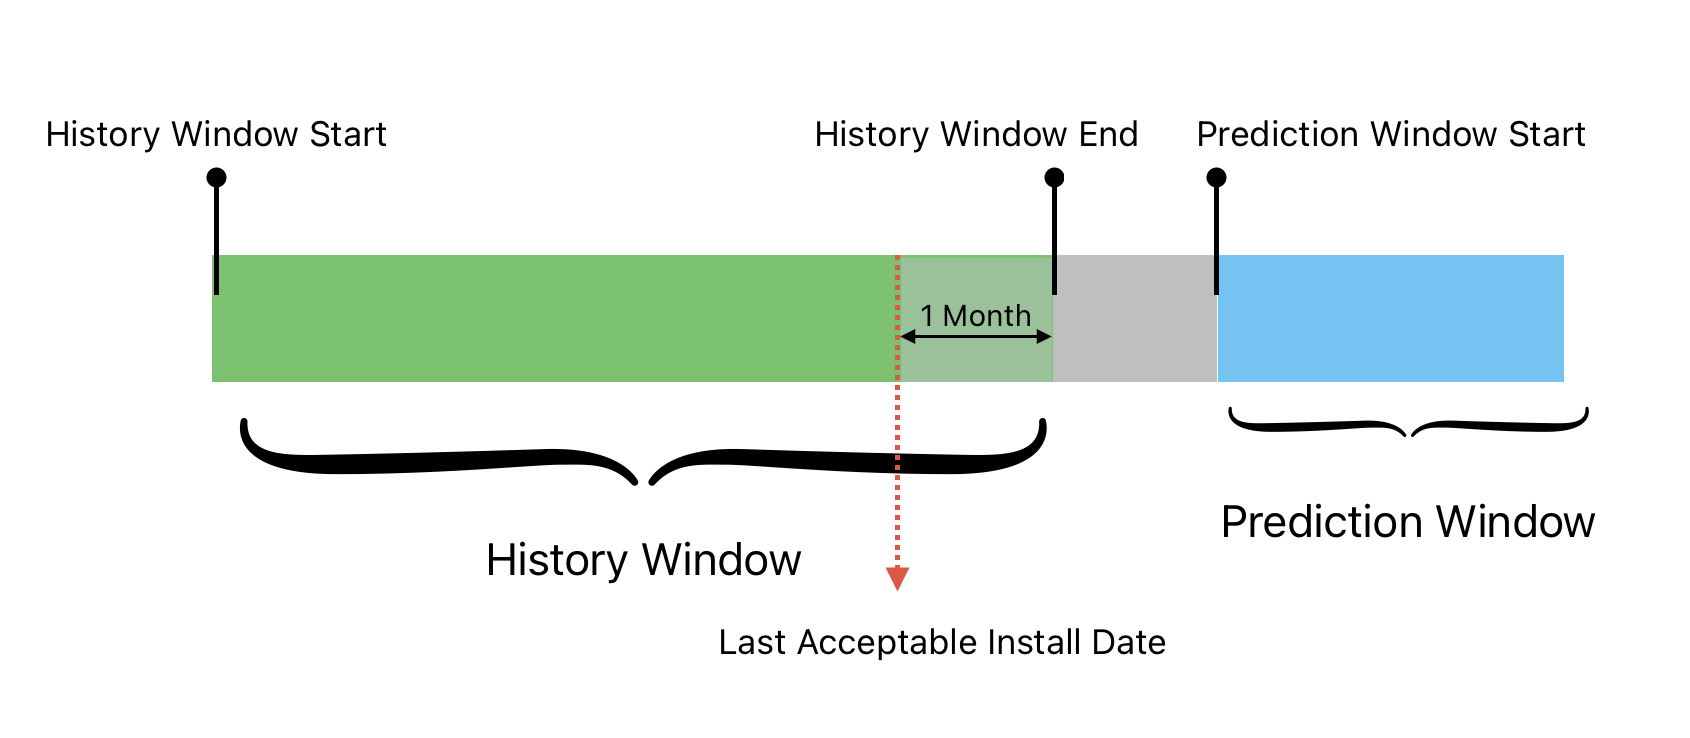

We have two approaches to choose from. The first, simpler approach involves aggregating user data and deriving relevant features without considering time dependency or event sequence. We can then use this data model to train our churn prediction model, capturing the event sequence using appropriate features.

The second approach focuses on utilizing the event sequence of each customer as our data model. By employing time series-related models, we can predict churn by analyzing the chronological order of events.

We kick off our investigation with the first approach. If the results don't quite measure up, we'll give the second one a shot, which is a bit more complicated.

## **Feature Engineering**

In order to  create features in History Window. It's important to only use History window for calculating features and prevent data leakage from Prediction window.

In this section we aggregate different event logs to the user level in order to create meaningful features for users in a way that captures user behaviour.

In [ ]:
# history_window_start= min([df_feature['InstallDate'].min(), df_feature['dateCreated'].min()]).date()
# history_window_end= max([df_feature['InstallDate'].max(), df_feature['dateCreated'].max()]).date()
history_window_start = pd.to_datetime('2017-04-01', format='%Y-%m-%d')
history_window_end = pd.to_datetime('2017-06-01', format='%Y-%m-%d')
prediction_window_start = pd.to_datetime('2017-07-01', format='%Y-%m-%d')
install_end_date = history_window_end - DateOffset(months=1)
force_view = 1

In [ ]:
# filter users who have not enough activity
df_install = df_install.loc[df_install['InstallDate'] < install_end_date]

# Installs has no duplicates, no need to aggragate

In [ ]:
# Calculating average days between starts, to have app openning frequency
df_start = df_start.sort_values(['userId','dateCreated'])

df_ = df_start.groupby('userId').apply(
    lambda df: (df.dateCreated - df.dateCreated.shift(1)).dt.days).reset_index()

df_ = df_.rename(columns={'dateCreated': 'time_between_starts'})
df_.index = df_.level_1
df_start = df_start.join(df_['time_between_starts'])

# Aggregating Starts Events based on users
df_starts_agg = df_start.groupby('userId').agg(
    first_start = pd.NamedAgg(column='dateCreated', aggfunc='min'),
    last_start = pd.NamedAgg(column='dateCreated', aggfunc='max'),
    avg_starting_frequency = pd.NamedAgg(column='time_between_starts', aggfunc='mean'),
    ).reset_index()

# Calculating average weekly count of starting the app based on users
df_ = df_start.copy(deep=True)
df_ = df_.assign(count=1).groupby(['userId', pd.Grouper(key='dateCreated', freq='W')])['count'].sum().reset_index()
df_ = df_.groupby('userId').agg(avg_weekly_starts = pd.NamedAgg(column='count', aggfunc='mean'))

# Final aggregated start events at user level
df_starts_agg= pd.merge(df_starts_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one')

In [ ]:
df_starts_agg.head()

In [ ]:
# Concatenating install, starts and views events to have all activities of users in one place in order to use it in feature engineering
df_install_ = df_install[['InstallDate','userId']].copy(deep=True).rename(columns={'InstallDate':'dateCreated'})
df_start_ = df_start[['dateCreated','userId']].copy(deep=True)
df_view_ = df_view[['dateCreated','userId']].copy(deep=True)

df_install_['event_type'] = 'install'
df_start_ ['event_type'] = 'start'
df_view_ ['event_type'] = 'view'

df_event = pd.concat([df_install_.assign(event_count=1), df_start_.assign(event_count=1), df_view_.assign(event_count=1)],axis=0, ignore_index= True)
df_event = df_event.groupby(['userId', 'event_type', pd.Grouper(key='dateCreated', freq='d')])['event_count'].sum().reset_index() # daily aggregation

In [ ]:
df_event

In [ ]:
# Aggregating events
df_event_agg = df_event.groupby('userId').agg(
    first_event = pd.NamedAgg(column='dateCreated', aggfunc='min'),
    last_event = pd.NamedAgg(column='dateCreated', aggfunc='max'),
    total_event_count = pd.NamedAgg(column='event_count', aggfunc='sum')
    ).reset_index()

In [ ]:
# Calculating average active days in a week at user level
df_ = df_event.copy(deep=True)
df_ = df_.assign(count=1).groupby(['userId', pd.Grouper(key='dateCreated', freq='W')])['count'].sum().reset_index()
df_ = df_.groupby('userId').agg(avg_weekly_active_days = pd.NamedAgg(column='count', aggfunc='mean'))

# merge the calculated metric back to the dataframe
df_event_agg = pd.merge(df_event_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicate

In [ ]:
#Calculating average time between events for each user - if user has one event this value would be null
df_ = df_event[['userId','dateCreated']].copy(deep=True)
df_ = df_.drop_duplicates()
df_ = df_.sort_values(['userId','dateCreated'])
df_ = df_.groupby('userId').apply(
    lambda df: (df.dateCreated - df.dateCreated.shift(1)).dt.days).reset_index()

df_ = df_.rename(columns={'dateCreated': 'time_between_events'})
df_.index = df_.level_1
df_ = df_.groupby('userId').agg( avg_activity_frequency = pd.NamedAgg(column='time_between_events', aggfunc='mean'))

# merge the calculated metric back to the dataframe
df_event_agg = pd.merge(df_event_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicate

In [ ]:
df_event_agg.head()

In [ ]:
# Aggregating view events at user level
df_view_agg = df_view.groupby('userId').agg(
    last_view = pd.NamedAgg(column='dateCreated', aggfunc='max'),
    first_view = pd.NamedAgg(column='dateCreated',aggfunc='min'),
    med_page_turn = pd.NamedAgg(column='page_turn_count', aggfunc='median'),
    avg_view_duration = pd.NamedAgg(column='view_duration', aggfunc='mean')
    ).reset_index()

df_ = df_view.copy(deep=True)
df_ = df_.groupby(['userId', pd.Grouper(key='dateCreated', freq='W')])['brochure_id'].size().reset_index()
df_ = df_.groupby('userId').agg(avg_weekly_views = pd.NamedAgg(column='brochure_id', aggfunc='mean'))

df_view_agg= pd.merge(df_view_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one')

In [ ]:
df_view_agg.head()

In [ ]:
# Joining all data frames to have a unified table at user level
df_tmp = pd.merge(df_install, df_starts_agg, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicate
df_tmp2 = pd.merge(df_tmp, df_event_agg, left_on='userId', right_on='userId', how='left', validate='one_to_one' ) # validating there is no duplicate
df_feature = pd.merge(df_tmp2, df_view_agg, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicates

In [ ]:
df_feature.head(3)

Adding more features to enrich the data model

In [ ]:
def calculate_day_diff(in_date, ref_date):
    return (ref_date - in_date).days

In [ ]:
df_feature['tenure'] = df_feature['InstallDate'].apply(calculate_day_diff, args=(history_window_end,)) # user tenure at the end of history window
df_feature['active_age'] = (df_feature['last_event'] - df_feature['first_event']).dt.days
df_feature['recency'] = df_feature['last_event'].apply(calculate_day_diff, args=(history_window_end,)) # user recency at the end of history window
df_feature['has_start'] = df_feature['first_start'].notna().astype(int)
df_feature['has_view'] = df_feature['first_view'].notna().astype(int)

Renaming columns to be consistent and easier to use

In [ ]:
df_feature.columns

In [ ]:
df_feature.rename(columns={'InstallDate':'install_date',
                           'productId':'product_id',
                           'userId':'user_id',
                           'campaignId':'campaign_id'}, inplace=True)

In [ ]:
df_x = df_feature.drop(['install_date','first_start','last_start','first_event','last_event','first_view','last_view', 'id'], axis=1)

### Missing Values

Here we don't used interpolation methods or dropping missing values as we have created the features ourselves, we can manually replace missing values by meaningful numbers.

In [ ]:
# Filling the null values of created features
df_x.fillna({'avg_starting_frequency':(history_window_end - history_window_start).days,
             'avg_weekly_starts':0,
             'avg_weekly_active_days':0,
             'avg_activity_frequency':(history_window_end - history_window_start).days,
             'med_page_turn':0,
             'avg_view_duration':0,
             'avg_weekly_views':0
             }, inplace=True)

In [ ]:
df_x.head()

In [ ]:
df_x.isnull().sum()

product_id                 0
user_id                    0
model                     27
campaign_id                0
avg_starting_frequency     0
avg_weekly_starts          0
total_event_count          0
avg_weekly_active_days     0
avg_activity_frequency     0
med_page_turn              0
avg_view_duration          0
avg_weekly_views           0
tenure                     0
active_age                 0
recency                    0
has_start                  0
has_view                   0
dtype: int64

## How many user viewed or start the app after install?

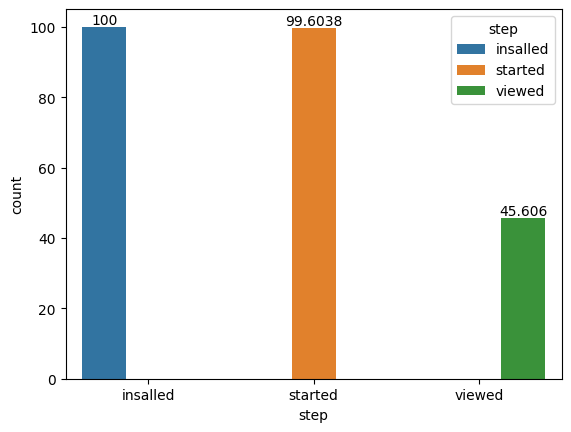

In [ ]:
# Visualizing customer drops in different steps
data_viz = [['insalled', 100* df_feature.user_id.size/df_feature.user_id.size],
            ['started', 100*df_feature.has_start.sum()/df_feature.user_id.size],
            ['viewed', 100*df_feature.has_view.sum()/df_feature.user_id.size]]

df_viz = pd.DataFrame(data_viz, columns=['step', 'count'])
# df_viz.plot.bar(x='step',y='count')
ax = sns.barplot(df_viz, x='step', y='count', hue="step")
for i in ax.containers:
    ax.bar_label(i,)

The plot above shows only 45 percent of users viewed brochures over the history window.

# Defining Churn and Calculating Lables
We classify churn as the absence of any activity. Hence, if a user initiated the app or accessed any brochures during the target month, we regard them as not having churned.

In [ ]:
active_view = df_view_target['userId'].drop_duplicates().rename('user_id')
active_start = df_start_target['userId'].drop_duplicates().rename('user_id')
active_users = pd.concat([active_view, active_start]).drop_duplicates()

In [ ]:
# Calculating Churn label
df = pd.merge(df_x, active_users, left_on='user_id', right_on='user_id', how='left' , validate='one_to_one', indicator=True)
df['churn'] = np.where(df['_merge']== 'both', 0, 1)
df = df.drop(columns=['_merge'])

**Churn Rate:**

In [ ]:
# Churn Rate
100* df['churn'].sum()/df['user_id'].nunique()

76.70425683226658

**Churn Rate by Product:**

In [ ]:
# Churn Rate by Product
df_churn_product = df.groupby('product_id').agg(
    churn = pd.NamedAgg(column='churn', aggfunc='sum'),
    total = pd.NamedAgg(column= 'user_id', aggfunc=pd.Series.nunique)
).reset_index()
df_churn_product['churn_rate'] = 100*df_churn_product['churn']/df_churn_product['total']
df_churn_product.head()

,product_id,churn,total,churn_rate
0,com-bonial-kaufda,3478,4897,71.023075
1,de-kaufda-android,2871,3226,88.995660
2,de.kaufda.kaufda,1201,1720,69.825581


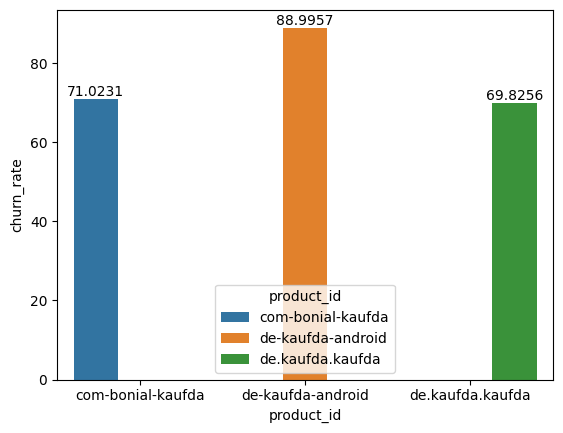

In [ ]:
# df_churn_product.plot.bar(x='product_id', y='churn_rate', rot=0)
ax = sns.barplot(df_churn_product, x='product_id', y='churn_rate', hue="product_id")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
import plotly.express as px
fig = px.scatter(x=df['tenure'], y=df['total_event_count'],
                 color = df['churn'], template = 'presentation',
                 opacity = 0.5, facet_col = df['product_id'],
                 title = 'Customer Churn by Tenure, Event Count, and Product',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Event #'})

fig.show()

In [ ]:
df.columns

Index(['product_id', 'user_id', 'model', 'campaign_id',
       'avg_starting_frequency', 'avg_weekly_starts', 'total_event_count',
       'avg_weekly_active_days', 'avg_activity_frequency', 'med_page_turn',
       'avg_view_duration', 'avg_weekly_views', 'tenure', 'active_age',
       'recency', 'has_start', 'has_view', 'churn'],
      dtype='object')

## Final Model features and Description:

| Feature Name           | Description |
|----------------------- |-------------|
| product_id             | Different native apps that we have on the market |
| model                  | Smartphone device name |
| campaign_id            | Indicates how the user installed the app|
| avg_starting_frequency | Average days between starting the app|
| avg_weekly_starts      | Average number of starts per week|
| total_event_count      | Total number of activities including start, view and install|
| avg_weekly_active_days | Average weekly number of days user had activity on|
| avg_activity_frequency | Average days between activities|
| med_page_turn          | Median of page turns in views |
| recency                | Days between last activity and end history end date|
| has_start              | If user has started the app ever|
| has_view               | If user viewed any brochure ever|

## Feature Selection

In this section, we assess the correlation between features and eliminate highly correlated ones. High correlation among features can adversely affect the stability, interpretability, and efficiency of the model. Therefore, we take the necessary steps to address this issue by removing features that exhibit strong correlations.

In [ ]:
data = df.drop(columns=['user_id'])

<ipython-input-57-d1b408b1ddd0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



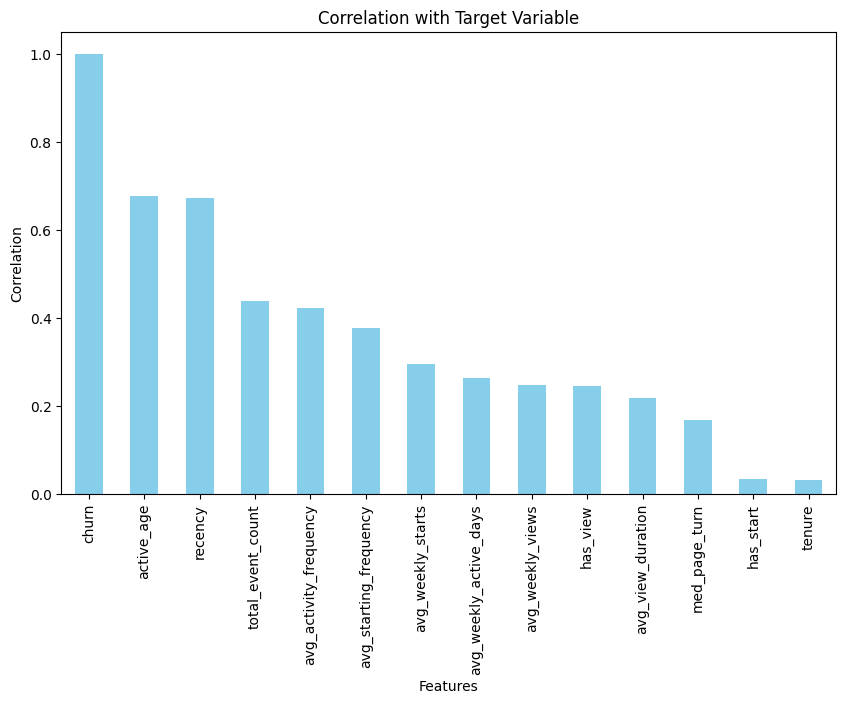

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Calculate the correlation of features with the target variable
correlation_with_target = correlation_matrix['churn']

# This will give you a Series with correlation values for each feature
# You can sort it to see the most correlated features
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Create a bar plot to visualize correlations
plt.figure(figsize=(10, 6))
sorted_correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation with Target Variable")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

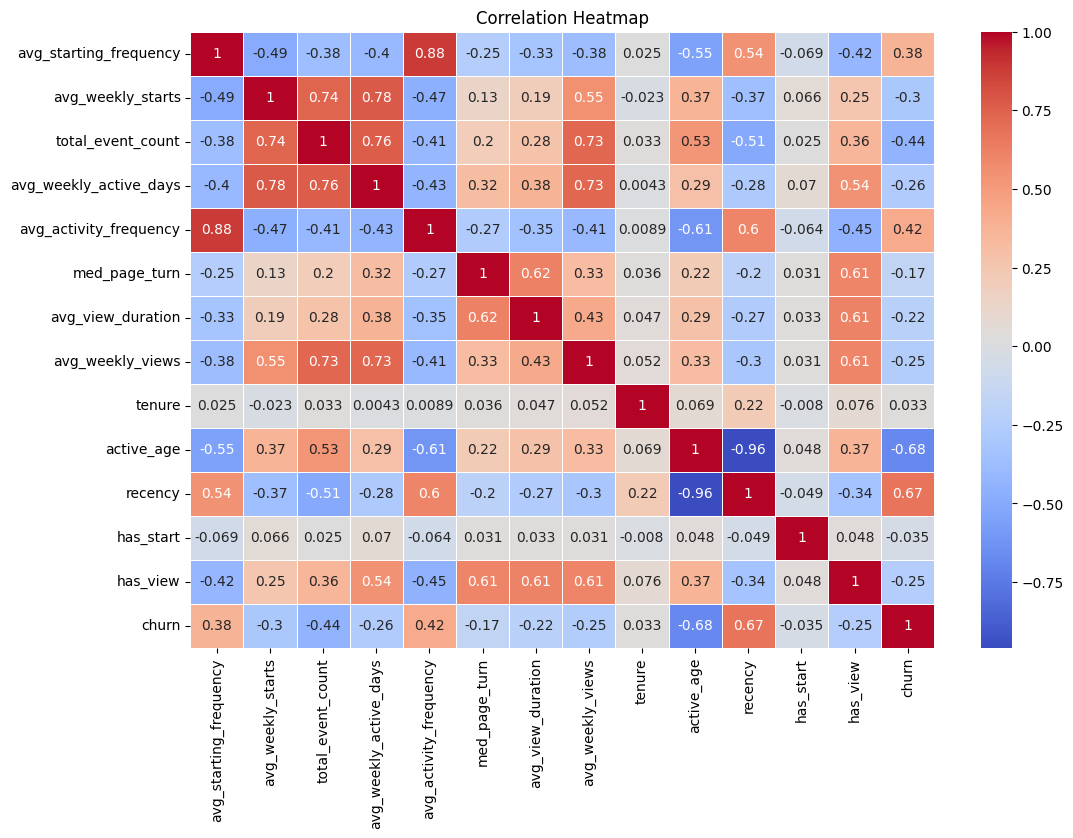

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

Removing hight correlated features

In [ ]:
correlation_matrix = data.drop(columns=['churn']).corr()
# Set a correlation threshold
correlation_threshold = 0.75

# Create a mask to identify highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)


<ipython-input-59-e7732a374f0b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
highly_correlated_features

{'avg_activity_frequency', 'avg_weekly_active_days', 'recency'}

In [ ]:
df_corr_filtered = data.drop(columns=highly_correlated_features)

<ipython-input-62-5840e82cfd42>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



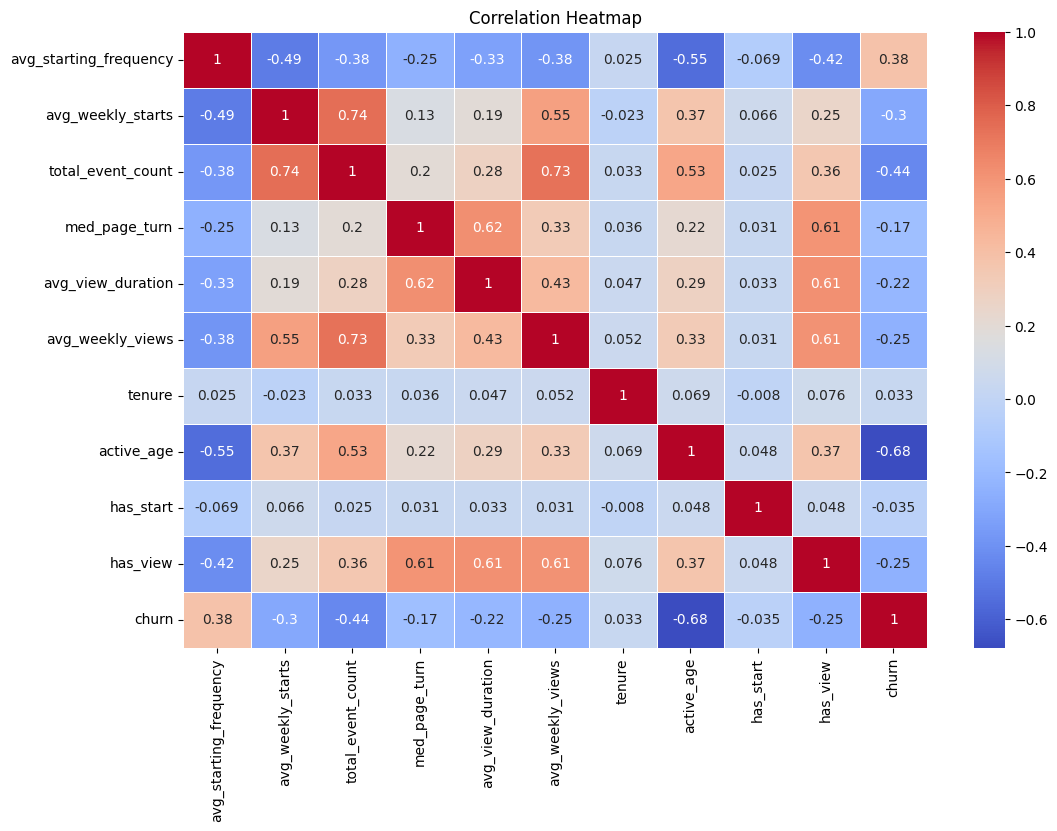

In [ ]:
# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_filtered.corr(), annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

Calculating feature importance of our new set of features using random forest classification.

<Figure size 1000x600 with 0 Axes>

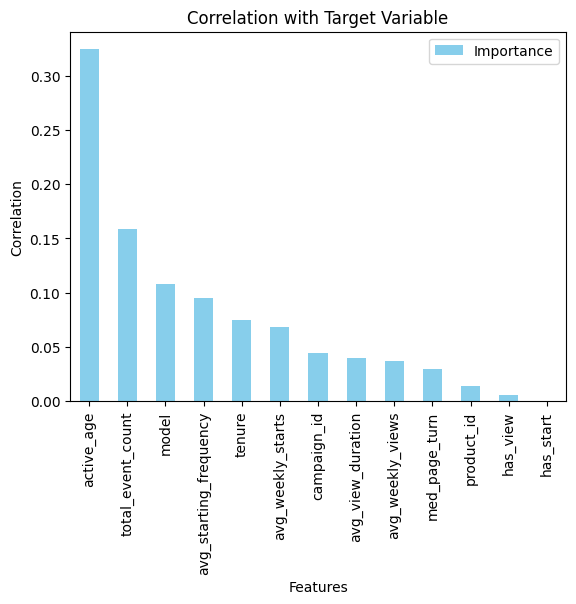

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import category_encoders as ce

# df = pd.get_dummies(df, columns=['product_id'], prefix='product')
encoder = ce.TargetEncoder(cols=['product_id','campaign_id','model'])
df_corr_filtered = encoder.fit_transform(df_corr_filtered, df_corr_filtered['churn'])

X = df_corr_filtered.drop(columns=['churn'])  # Update the target variable name
y = df_corr_filtered['churn']  # Update the target variable name

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
# print(feature_importance_df)
# Create a bar plot to visualize correlations
plt.figure(figsize=(10, 6))
feature_importance_df.plot(x='Feature',y='Importance', kind='bar', color='skyblue')
plt.title("Correlation with Target Variable")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Handling Imbalanced Data

As we can see from the result below, if we look at the problem as a two class classification problem; the number of samples in these two class are not consistent and we have an imbalanced classification problem.

In [ ]:
df_corr_filtered.groupby('churn').size()

churn
0    2293
1    7550
dtype: int64

For Handling imbalance we oversample the minority class with SMOTE method. SMOTE stands for Synthetic Minority Oversampling Technique.

SMOTE picks an instance randomly from the minority class. Then it finds its k nearest neighbors from the minority class itself. Then one of the neighbors gets chosen randomly and draws the line between these two instances. Then new synthetic examples are generated using a convex combination of these two instances

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


**Taking a closer and more in-depth look at our ultimate dataset.**

In [ ]:
profile = ProfileReport(df_corr_filtered, title="Profiling Report")
profile

## Choosing ML Model

Now we have our dataset ready and we can start developing our predictive model.

Here are the steps:
- Nomalizing the features
- Choosing an ML Model
- Training the model
- Tuning it's hyperparameters
- Evaluate the model

In [ ]:
dataset = df_corr_filtered.copy()

In [ ]:
# init setup
from pycaret.classification import *

In [ ]:
# Init setup
s = setup(dataset, target = 'churn', session_id = 123, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(9843, 14)"
4,Transformed data shape,"(9843, 14)"
5,Transformed train set shape,"(6890, 14)"
6,Transformed test set shape,"(2953, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Compare models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8972,0.9273,0.9508,0.9182,0.9342,0.7001,0.7024,1.2030
lightgbm,Light Gradient Boosting Machine,0.8948,0.9216,0.9497,0.9163,0.9326,0.6925,0.6953,0.7510
ada,Ada Boost Classifier,0.8898,0.9188,0.9412,0.9174,0.9291,0.6824,0.6837,0.3310
lda,Linear Discriminant Analysis,0.8817,0.9130,0.9137,0.9309,0.9222,0.6756,0.6762,0.1080
xgboost,Extreme Gradient Boosting,0.8914,0.9117,0.9489,0.9130,0.9306,0.6818,0.6848,0.4100
lr,Logistic Regression,0.8882,0.9116,0.9317,0.9233,0.9275,0.6839,0.6842,1.1200
rf,Random Forest Classifier,0.8874,0.9088,0.9429,0.9131,0.9277,0.6727,0.6746,1.2170
et,Extra Trees Classifier,0.8826,0.9040,0.9338,0.9149,0.9242,0.6636,0.6645,0.8980
knn,K Neighbors Classifier,0.8849,0.8878,0.9370,0.9150,0.9259,0.6688,0.6699,0.1320
nb,Naive Bayes,0.6151,0.8700,0.5215,0.9573,0.6748,0.2928,0.3815,0.0560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Create gradient boosting classification model as it outperforms the rest in most of the measures.

In [ ]:
gbc_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8868,0.9219,0.9414,0.9138,0.9274,0.6711,0.6726
1,0.8752,0.9155,0.9433,0.8991,0.9207,0.6289,0.6329
2,0.8984,0.9430,0.9527,0.9180,0.9351,0.7021,0.7047
3,0.8853,0.9246,0.9395,0.9136,0.9264,0.6676,0.6689
4,0.9158,0.9217,0.9603,0.9321,0.9460,0.7554,0.7571
5,0.8999,0.9234,0.9527,0.9196,0.9358,0.7084,0.7107
6,0.8897,0.9208,0.9413,0.9170,0.9290,0.6824,0.6836
7,0.8940,0.9179,0.9527,0.9129,0.9323,0.6887,0.6920
8,0.9158,0.9361,0.9640,0.9288,0.9461,0.7543,0.7571


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Hyperparameter Tuning

Tuning the hyperparameters of the gradient boosting model

In [ ]:
tuned_gbc = tune_model(gbc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8665,0.9091,0.9282,0.9009,0.9143,0.6120,0.6134
1,0.8752,0.9062,0.9433,0.8991,0.9207,0.6289,0.6329
2,0.8955,0.9357,0.9471,0.9193,0.9330,0.6964,0.6979
3,0.8882,0.9139,0.9433,0.9139,0.9284,0.6745,0.6763
4,0.9071,0.9224,0.9546,0.9266,0.9404,0.7301,0.7318
5,0.8955,0.9172,0.9508,0.9161,0.9331,0.6951,0.6976
6,0.8882,0.9189,0.9413,0.9153,0.9281,0.6775,0.6789
7,0.8882,0.9051,0.9432,0.9138,0.9282,0.6761,0.6778
8,0.9086,0.9205,0.9659,0.9189,0.9418,0.7289,0.7339


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Model Evaluation

For Evaluating our trained model first we can plot Confusion Matrix to check the performance of the classifier in each class.

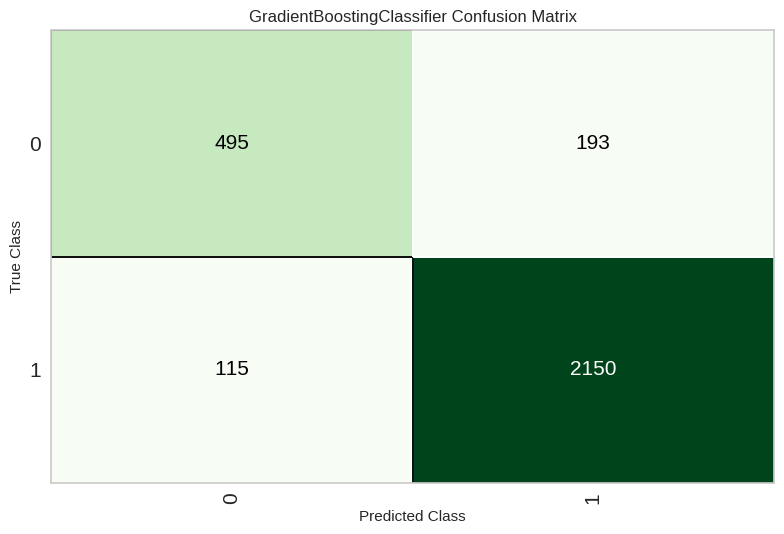

In [ ]:
# Plot confusion matrix
plot_model(tuned_gbc, plot = 'confusion_matrix')

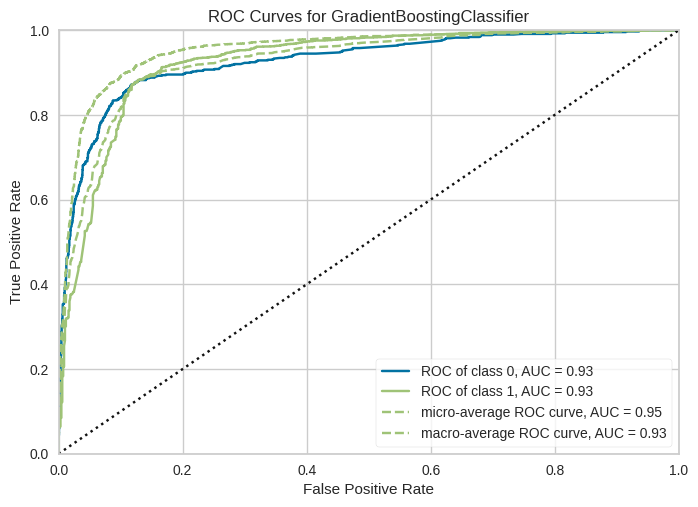

In [ ]:
# Plot AUC
plot_model(tuned_gbc, plot = 'auc')

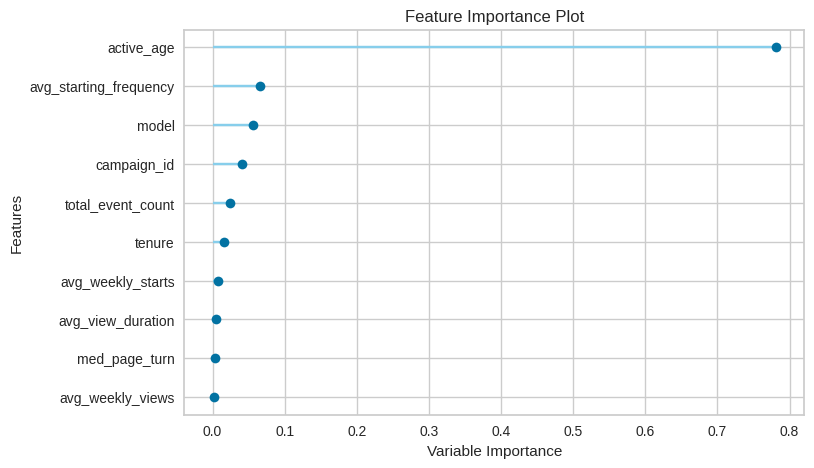

In [ ]:
# plot feature importance
plot_model(tuned_gbc, plot = 'feature')

In [ ]:
import plotly.express as px
fig = px.scatter(x=dataset['active_age'], y=df['total_event_count'],
                 color = df['churn'], template = 'presentation',
                 opacity = 0.5, facet_col = df['product_id'],
                 title = 'Customer Churn by Active Age, Total Event #, and Product',
                 labels = {'x' : 'Active Age', 'y' : 'Total Event #'})

fig.show()

## Prediction

Now, we evaluate the model by making predictions on the test set that we had previously set aside and assess its performance.

In [ ]:
# Predict on test set
holdout_pred = predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8957,0.9268,0.9492,0.9176,0.9332,0.6962,0.6983


In [ ]:
# Show predictions
holdout_pred.head()

,product_id,model,campaign_id,avg_starting_frequency,avg_weekly_starts,total_event_count,med_page_turn,avg_view_duration,avg_weekly_views,tenure,active_age,has_start,has_view,churn,prediction_label,prediction_score
4801,0.889957,0.867033,0.76486,61.0,1.0,2,0.0,0.0,0.000000,58,0,1,0,1,1,0.9615
8221,0.698256,0.722184,0.76486,0.4,6.0,103,10.0,78640.449438,10.666667,59,56,1,1,0,1,0.7124
3715,0.710231,0.797352,0.76486,61.0,1.0,2,0.0,0.0,0.000000,45,0,1,0,1,1,0.9781
1998,0.889957,0.788762,0.76486,61.0,1.0,2,0.0,0.0,0.000000,46,0,1,0,1,1,0.9620
9695,0.710231,0.681223,0.76486,61.0,1.0,2,0.0,0.0,0.000000,49,0,1,0,1,1,0.9264
